In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def read_encoded_sas(file):
    for enc in ['iso-8859-1','iso-8859-2','utf-8','unicode','ascii','windows-1250','windows-1252','latin-1']:
        try:
            df=pd.read_sas(file, encoding=enc)
        except:
            pass
        else:
            break
    print ("Encoding used: " + enc)
    return df

In [10]:
file = 'dm.sas7bdat'
columns = ['SUBJID','SEX','AGE','RACE','COUNTRY','ARMCD']

dmx=read_encoded_sas(file)
dmx = dmx[columns]

#dmx = dmx[dmx.ARMCD == '0']
dmx['REGION'] = dmx.COUNTRY.map(lambda x: 'North America' if x == "CAN" or x == b'CAN' or x == "USA" or x == b"USA" else 'Rest of World')
dmx.shape

Encoding used: iso-8859-1


(889, 7)

In [11]:
data=dmx[dmx.ARMCD == '0']
ref=dmx

In [19]:
def risk_stats(ds,dsref,cols):
    stats={}
    ref=dsref.groupby(cols).size().reset_index().rename(columns={0:'tot'})
    d=pd.merge(ds,ref, how='left')
    d['risk']=1/d.tot
    stats['Records'] = len(ds)
    stats['Average Risk'] = round(d.risk.mean(),5)
    stats['Maximum Risk'] = round(d.risk.max(),5)
    stats['Unique Records'] = int(d[d.risk==1].risk.count())
    stats['Proportion Unique'] = round(stats['Unique Records'] / len(ds),6)
    return {' '.join(sorted(cols)):stats}

def variants(dict):
    d=[]
    for i in range(1,2**len(dict)):
        d.append([x for j,x in enumerate(dict) if bin(i)[2:].zfill(len(dict))[j]=='1'])
    return d

def test_all(ds,ref,vars):
    risks={}
    for variant in variants(vars):
        risks.update(risk_stats(ds,ref,variant) )
    return risks   

In [20]:
risks = test_all(data,ref,['AGE','SEX','REGION'])
risks

{'AGE': {'Average Risk': 0.04624,
  'Maximum Risk': 1.0,
  'Proportion Unique': 0.006682,
  'Records': 449,
  'Unique Records': 3},
 'AGE REGION': {'Average Risk': 0.08032,
  'Maximum Risk': 1.0,
  'Proportion Unique': 0.01559,
  'Records': 449,
  'Unique Records': 7},
 'AGE REGION SEX': {'Average Risk': 0.14415,
  'Maximum Risk': 1.0,
  'Proportion Unique': 0.033408,
  'Records': 449,
  'Unique Records': 15},
 'AGE SEX': {'Average Risk': 0.08421,
  'Maximum Risk': 1.0,
  'Proportion Unique': 0.008909,
  'Records': 449,
  'Unique Records': 4},
 'REGION': {'Average Risk': 0.00227,
  'Maximum Risk': 0.00592,
  'Proportion Unique': 0.0,
  'Records': 449,
  'Unique Records': 0},
 'REGION SEX': {'Average Risk': 0.00466,
  'Maximum Risk': 0.01923,
  'Proportion Unique': 0.0,
  'Records': 449,
  'Unique Records': 0},
 'SEX': {'Average Risk': 0.00224,
  'Maximum Risk': 0.00295,
  'Proportion Unique': 0.0,
  'Records': 449,
  'Unique Records': 0}}

In [21]:
risks['AGE REGION SEX']['Average Risk']

0.14415

In [22]:
rr = pd.DataFrame.from_dict(risks, orient='index')

In [23]:
rr.sort_values(['Average Risk'])

,Records,Average Risk,Maximum Risk,Unique Records,Proportion Unique
SEX,449,0.00224,0.00295,0,0.000000
REGION,449,0.00227,0.00592,0,0.000000
REGION SEX,449,0.00466,0.01923,0,0.000000
AGE,449,0.04624,1.00000,3,0.006682
AGE REGION,449,0.08032,1.00000,7,0.015590
AGE SEX,449,0.08421,1.00000,4,0.008909
AGE REGION SEX,449,0.14415,1.00000,15,0.033408


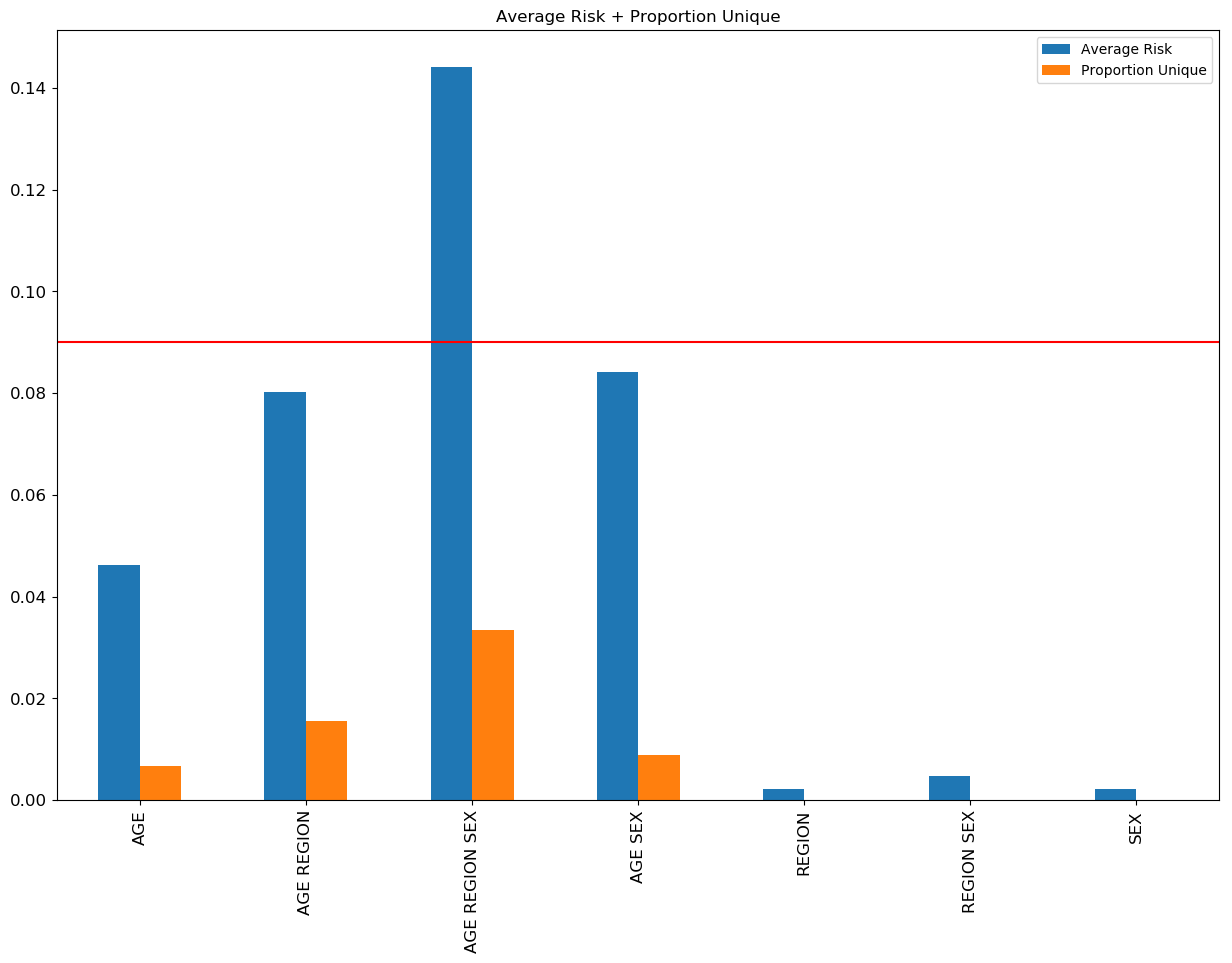

In [74]:
ax = rr[['Average Risk','Proportion Unique']].plot(kind='bar', title ="Average Risk + Proportion Unique",figsize=(15,10),legend=True, fontsize=12)
ax.axes.axhline(y=0.09, color='red')

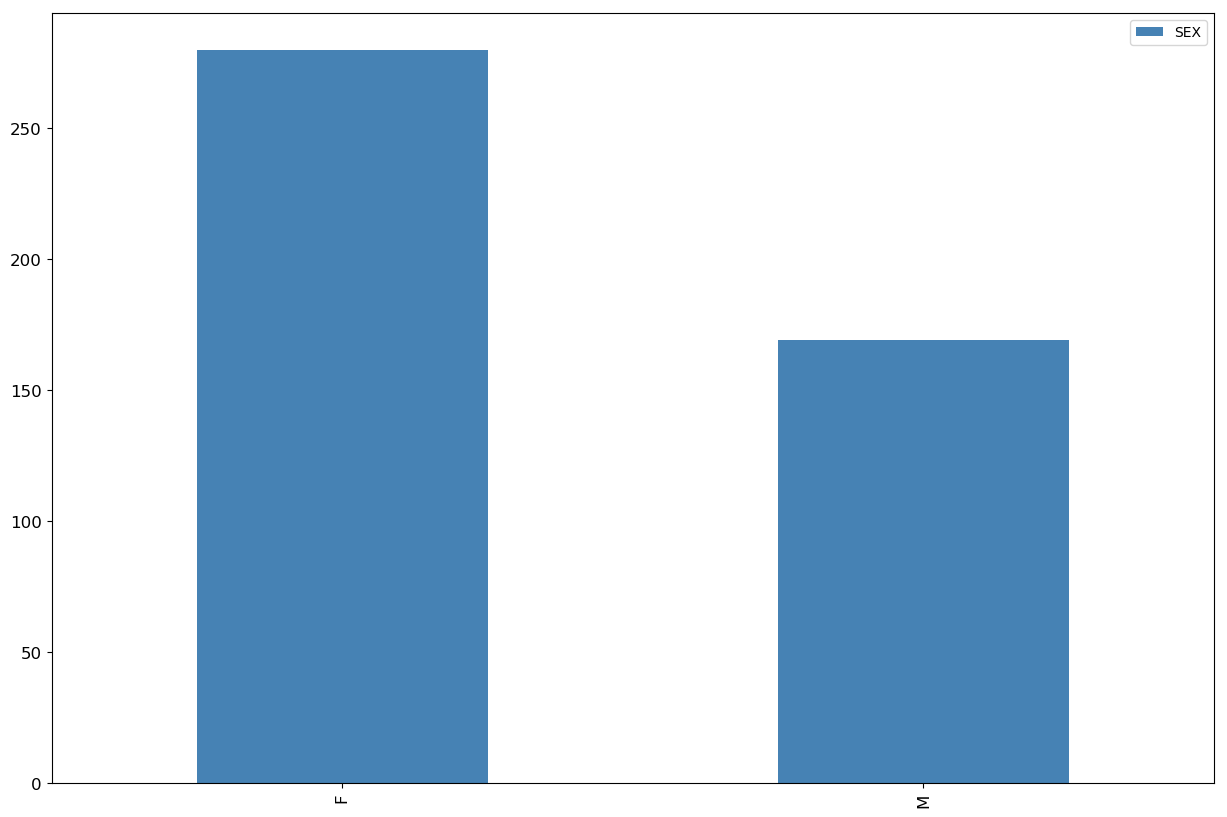

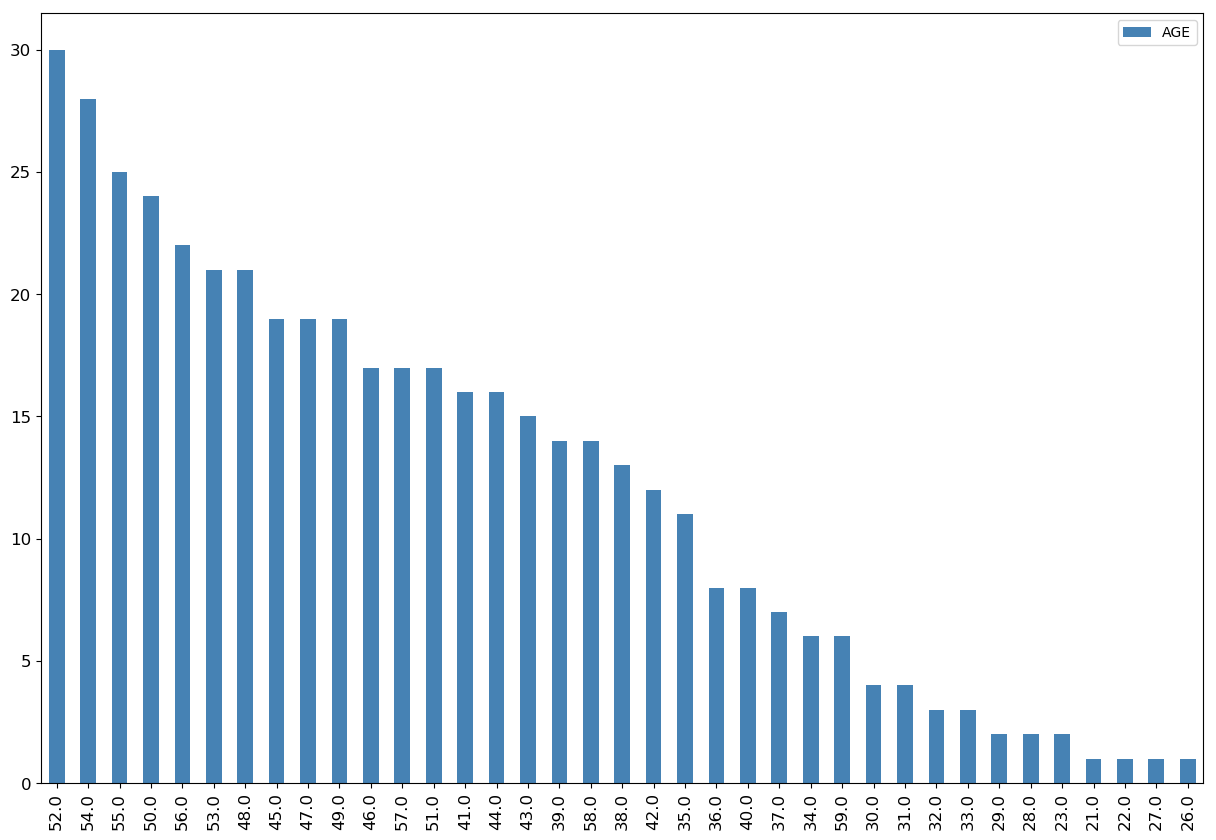

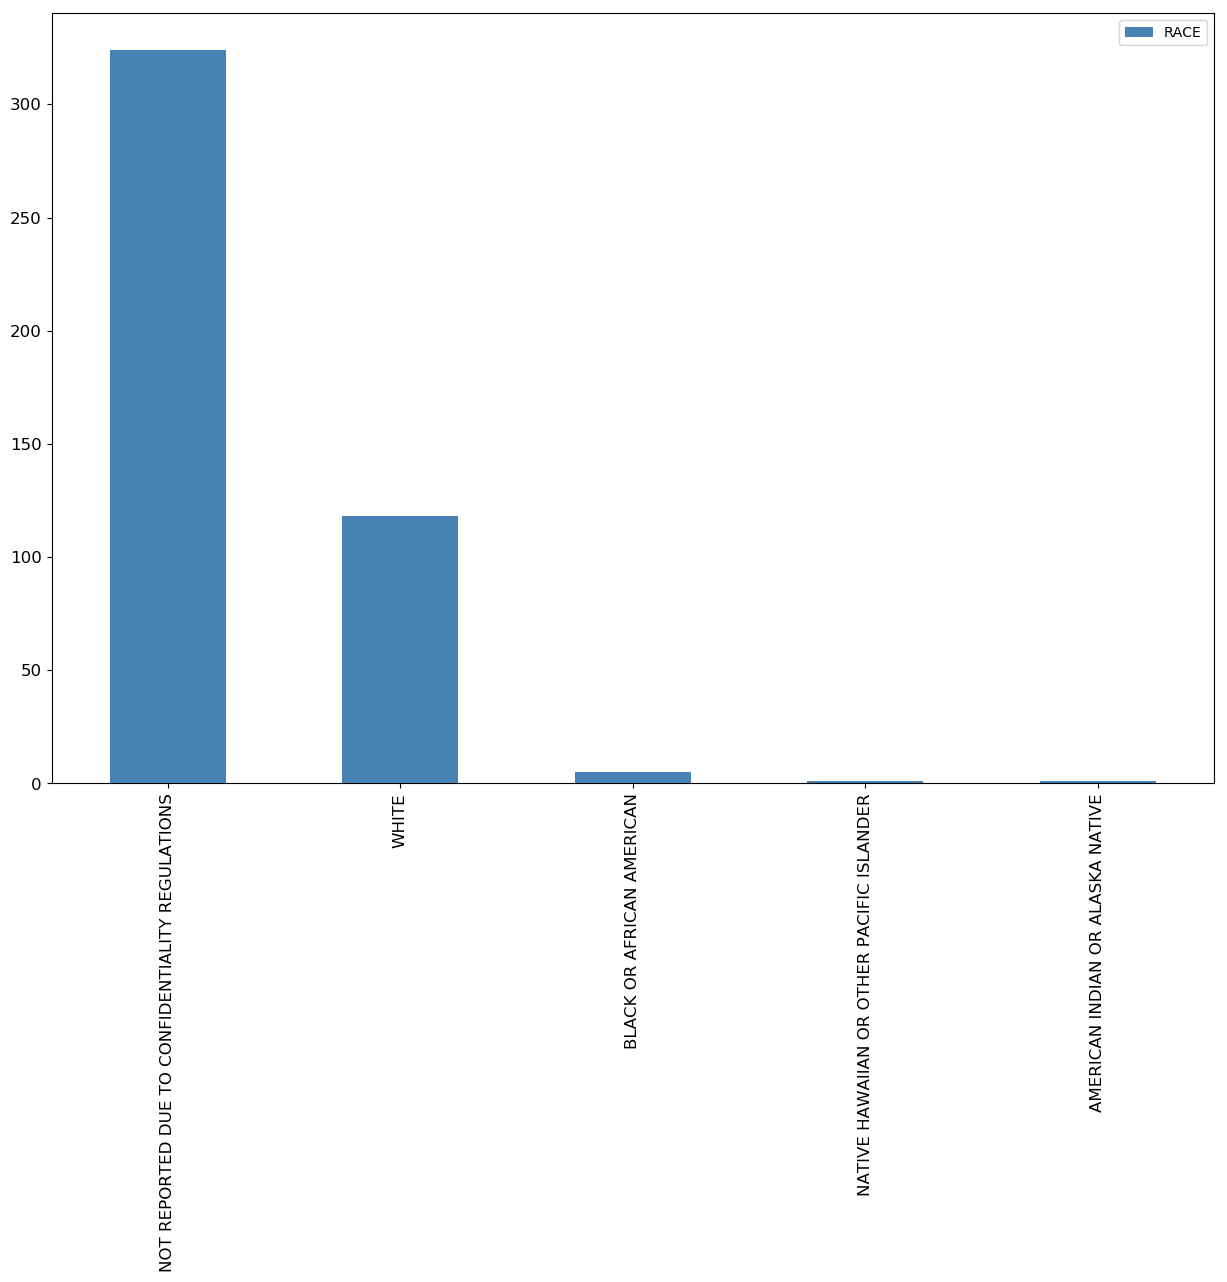

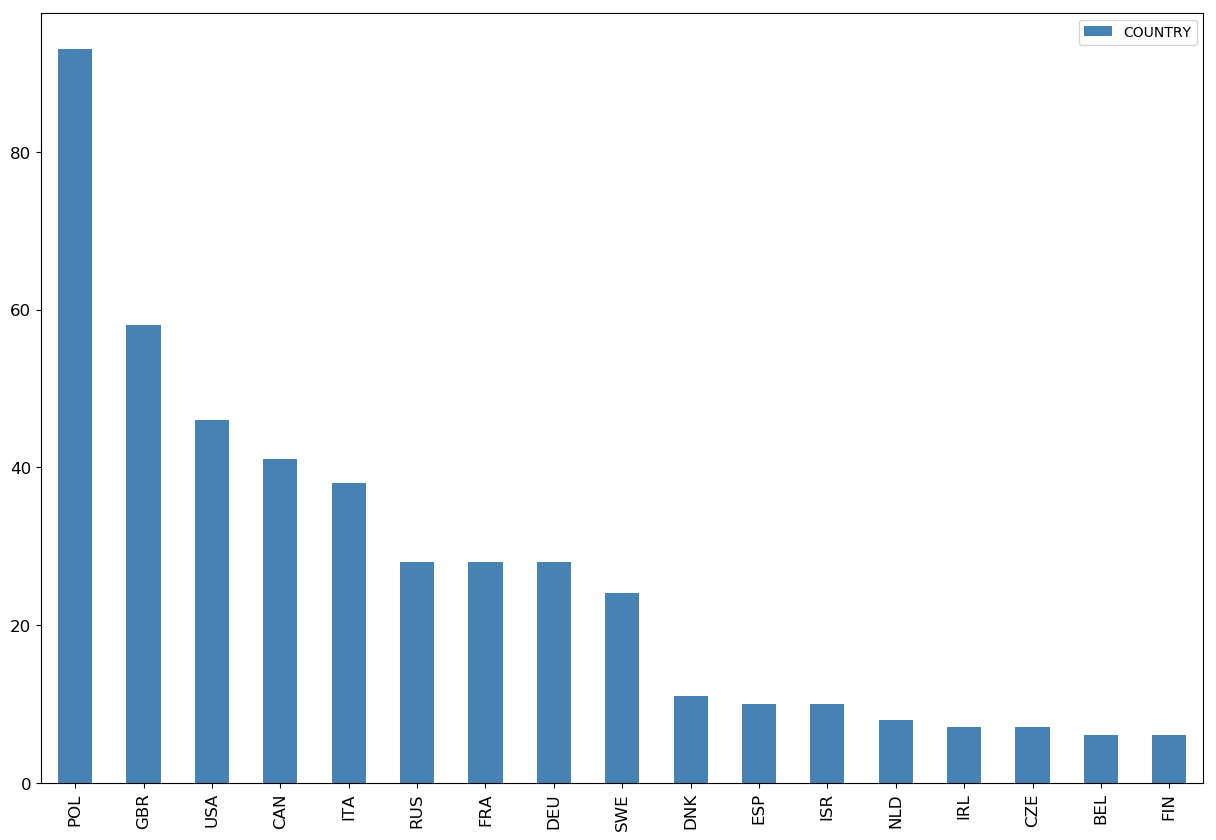

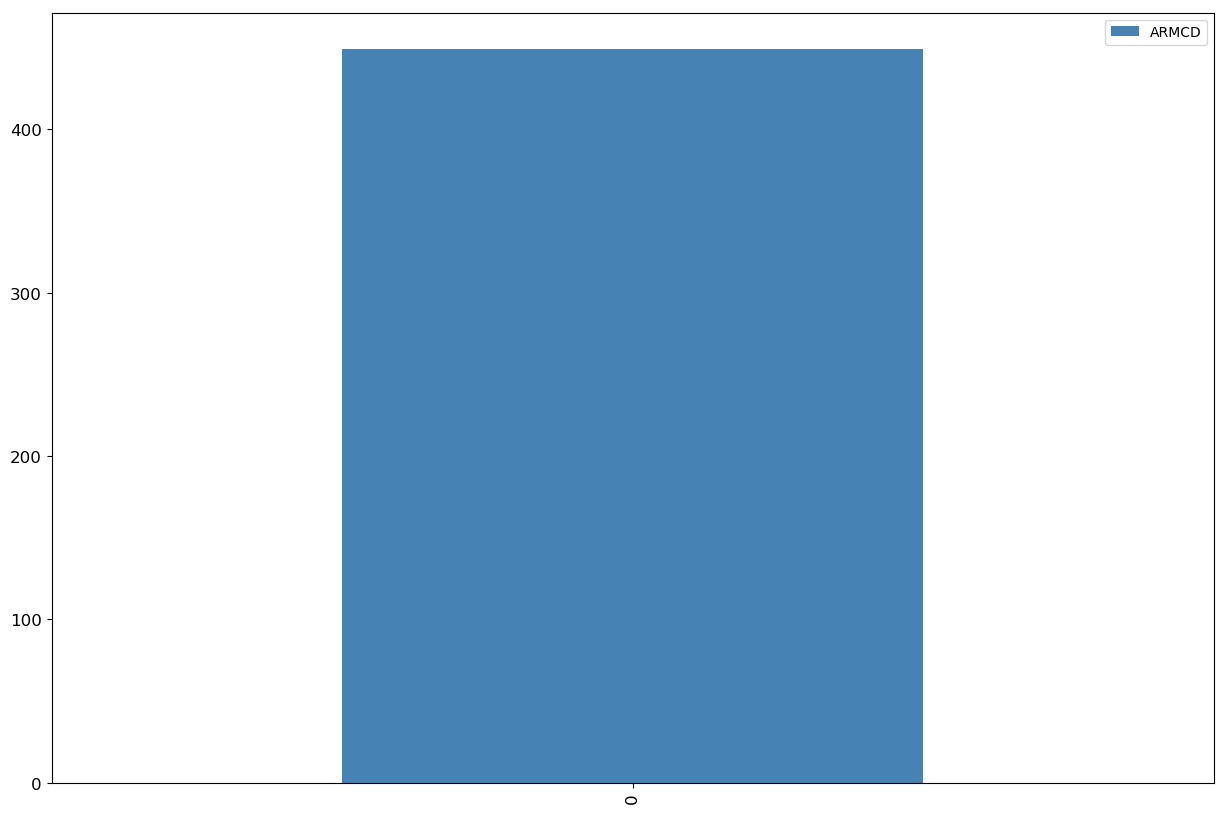

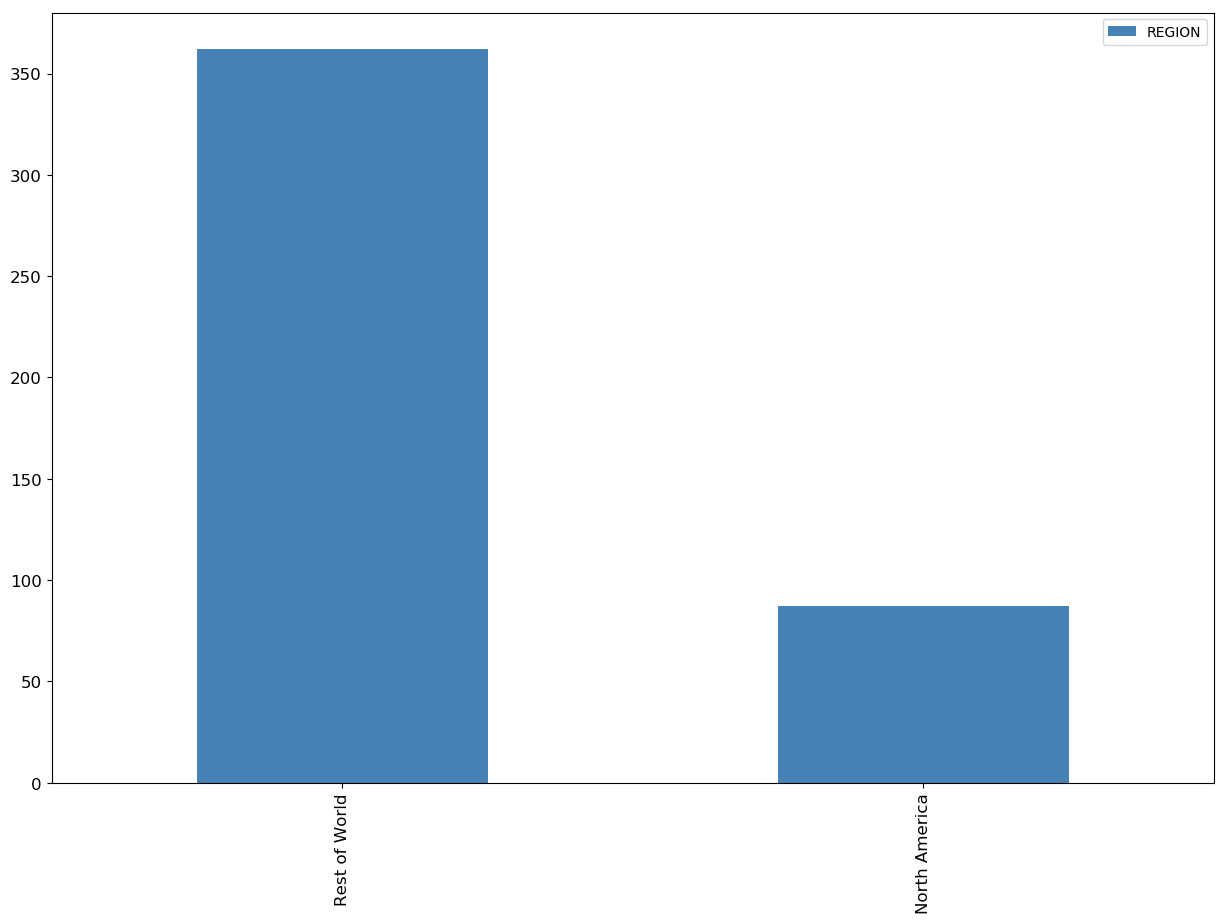

In [72]:
for col in data.columns:
    if col not in ["SUBJID", 'USUBJID']:
        ax = data[col].value_counts().plot(kind='bar', figsize=(15,10),legend=True, fontsize=12, color='steelblue')
        plt.show()

